In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
for_regression = pd.read_csv("for_regress.csv")
for_regression["x"] = for_regression["x"] / 10000
for_regression["x"] = for_regression["x"] / 4
for_regression["xerr"] = for_regression["x"] * 0.01
for_regression["yerr"] = for_regression["y"] * 0.01

In [4]:
for_regression

,x,y,xerr,yerr
0,0.000000,0.009465,0.000000,0.000095
1,0.000225,0.009802,0.000002,0.000098
2,0.000900,0.010770,0.000009,0.000108
3,0.002025,0.012404,0.000020,0.000124
4,0.003600,0.014744,0.000036,0.000147
5,0.005625,0.017794,0.000056,0.000178


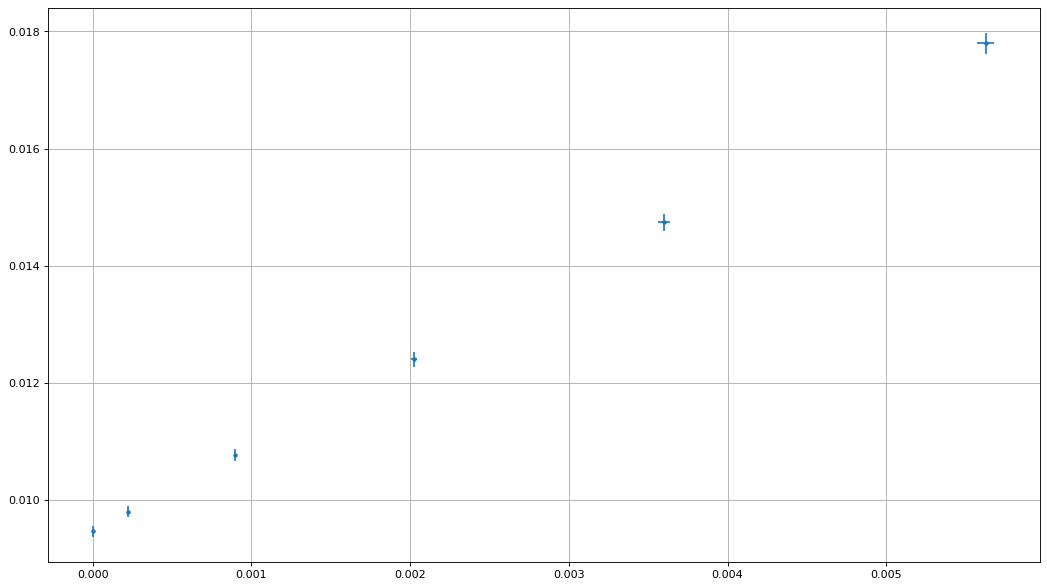

In [5]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=for_regression["x"], y=for_regression["y"], xerr=for_regression["xerr"], yerr=for_regression["yerr"], fmt='.')
plt.grid(True)

In [6]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata= for_regression["x"], ydata=for_regression["y"], )

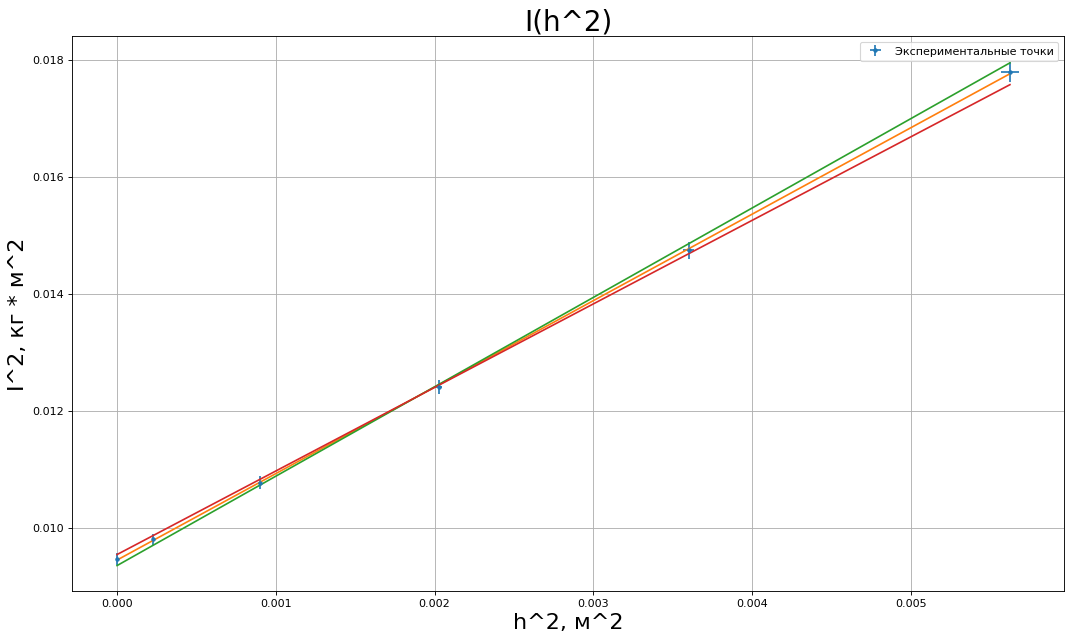

In [9]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=for_regression["x"], y=for_regression["y"], xerr=for_regression["xerr"], yerr=for_regression["yerr"], fmt='.', label='Экспериментальные точки')
plt.title("I(h^2)", fontsize=25)
plt.xlabel("h^2, м^2", fontsize=20)
plt.ylabel("I^2, кг * м^2", fontsize=20)
plt.grid(True)
plt.legend()
delta = 0.05
plt.plot(for_regression["x"], line(for_regression["x"], params[0], params[1]), label="Истиная зависимость")
plt.plot(for_regression["x"], line(for_regression["x"], params[0] + delta, params[1] * 0.99), label="max")
plt.plot(for_regression["x"], line(for_regression["x"], params[0] - delta, params[1] * 1.01), label="min")

In [8]:
print(f"a = {params[0]:.3} \u00B1 {delta}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = 1.48 ± 0.05
b = 0.00945 ± 1.8e-05


In [10]:
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = 1.48 ± 0.0064
b = 0.00945 ± 1.8e-05


Метод хи квадрат